<a href="https://colab.research.google.com/github/LuisBGodoi/Portfolio/blob/main/DataMining_%C3%8Dndices_Mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índices

## Bibliotecas usadas

In [ ]:
try:
    from selenium import webdriver
    from webdriver_manager.chrome import ChromeDriverManager
    from selenium.webdriver.chrome.service import Service
    from selenium.webdriver.common.by import By
    import pandas as pd
    import time
    import pyautogui
    import requests
    import base64
    import json
    import numpy as np
    import sidrapy
    from bcb import currency, sgs
    from io import StringIO
    import glob
    import locale
    import os
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support import expected_conditions as EC
    import matplotlib.pyplot as plt 
    import pdfplumber
    from datetime import datetime, timedelta, date
except:
    !pip install selenium
    !pip install webdriver-manager
    !pip install openpyxl
    !pip install sidrapy
    !pip install python-bcb
    !pip install urllib3
    !pip install opencv_python
    !pip install pdfplumber
    !pip install pyautogui
    !pip install pandas_datareader
    pass

# Pegando dados de IPCA, IGPM e SELIC do BCB pela biblioteca bcb

In [ ]:
#Puxar do Banco Central Dados de IPCA, IGPM e SELIC
df = sgs.get({'IPCA': 433, 'IGPM': 189,'SELIC': 1178}, start='2002-01-01', multi=False)
# Ver como vem os dados
display(df)

[            IPCA
 Date            
 2002-01-01  0.52
 2002-02-01  0.36
 2002-03-01  0.60
 2002-04-01  0.80
 2002-05-01  0.21
 ...          ...
 2022-11-01  0.41
 2022-12-01  0.62
 2023-01-01  0.53
 2023-02-01  0.84
 2023-03-01  0.71
 
 [255 rows x 1 columns],
             IGPM
 Date            
 2002-01-01  0.36
 2002-02-01  0.06
 2002-03-01  0.09
 2002-04-01  0.56
 2002-05-01  0.83
 ...          ...
 2022-11-01 -0.56
 2022-12-01  0.45
 2023-01-01  0.21
 2023-02-01 -0.06
 2023-03-01  0.05
 
 [255 rows x 1 columns],
             SELIC
 Date             
 2001-12-31  19.05
 2002-01-02  19.05
 2002-01-03  19.05
 2002-01-04  19.05
 2002-01-07  19.05
 ...           ...
 2023-04-10  13.65
 2023-04-11  13.65
 2023-04-12  13.65
 2023-04-13  13.65
 2023-04-14  13.65
 
 [5350 rows x 1 columns]]

In [ ]:
#Tirar os DataFrames da lista e colocar cada um em um DataFrame separado

IPCA = df[0]
IGPM = df[1]
SELIC = df[2]
#Renomear as Colunas
IPCA = IPCA.rename(columns={'IPCA':'Mensal'})
IGPM = IGPM.rename(columns={'IGPM':'Mensal'})
SELIC = SELIC.rename(columns={'SELIC':'Anual'})

# Criar um coluna de valores acumulados desde 01/01/2002 sendo que nessa data
IPCA['Acumulado'] = 0
row,col = IPCA.shape
for i in range(0,row):
    if i == 0:
        IPCA.iloc[i,1] = 1000 * (1 + (IPCA.iloc[i,0])/100)
    else:
        IPCA.iloc[i,1] = IPCA.iloc[i-1,1]* (1 + (IPCA.iloc[i,0])/100)  
#Examinar como ficou o resultado final
display(IPCA)

,Mensal,Acumulado
Date,,
2002-01-01,0.52,1005.200000
2002-02-01,0.36,1008.818720
2002-03-01,0.60,1014.871632
2002-04-01,0.80,1022.990605
2002-05-01,0.21,1025.138886
...,...,...
2022-11-01,0.41,3549.654788
2022-12-01,0.62,3571.662648
2023-01-01,0.53,3590.592460


In [ ]:
#Realizar o mesmo para o IGPM
IGPM['Acumulado'] = 0
row,col = IGPM.shape
for i in range(0,row):
    if i == 0:
        IGPM.iloc[i,1] = 1000 * (1 + (IGPM.iloc[i,0])/100)
    else:
        IGPM.iloc[i,1] = IGPM.iloc[i-1,1]* (1 + (IGPM.iloc[i,0])/100)
#Examinar como ficou o resultado final
display(IGPM)

,Mensal,Acumulado
Date,,
2002-01-01,0.36,1003.600000
2002-02-01,0.06,1004.202160
2002-03-01,0.09,1005.105942
2002-04-01,0.56,1010.734535
2002-05-01,0.83,1019.123632
...,...,...
2022-11-01,-0.56,5349.239162
2022-12-01,0.45,5373.310738
2023-01-01,0.21,5384.594690


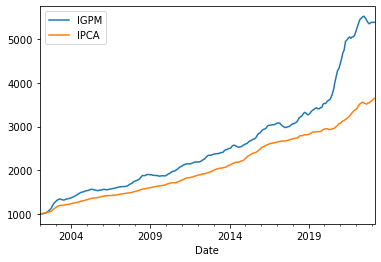

In [ ]:
#plotar os dois frente a frente para ver qual a diferença entre os dois
#IGPM['Acumulado'].plot()
#IPCA['Acumulado'].plot()
fig, ax = plt.subplots()
IGPM['Acumulado'].plot(kind='line',label='IGPM')
IPCA['Acumulado'].plot(kind='line',label='IPCA')
plt.legend()
plt.show()

In [ ]:
#Realizar o mesmo para o SELIC
SELIC['Acumulado'] = 0
row,col = SELIC.shape
for i in range(0,row):
    if i == 0:
        SELIC.iloc[i,1] = 1000 * ((1 + (SELIC.iloc[i,0])/100)**(1/252))
    else:
        SELIC.iloc[i,1] = SELIC.iloc[i-1,1]* 1 + (SELIC.iloc[i,0])  
#Examinar como ficou o resultado final
display(SELIC)

,Anual,Acumulado
Date,,
2001-12-31,19.05,1000.692197
2002-01-02,19.05,1019.742197
2002-01-03,19.05,1038.792197
2002-01-04,19.05,1057.842197
2002-01-07,19.05,1076.892197
...,...,...
2023-04-10,13.65,63814.652197
2023-04-11,13.65,63828.302197
2023-04-12,13.65,63841.952197


In [ ]:
#Criar uma coluna da SELIC Mensal
SELIC['Mensal'] = (1+SELIC['Anual'])**(1/12)-1

## Pegar dados do BCB pela api diretamente.

In [ ]:
#Importar csv
url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=csv'
    
html = requests.get(url).content

s = str(html,'ascii')
data = StringIO(s) 
SELIC=pd.read_csv(data,delimiter =";")
row,col = SELIC.shape
#Transformar Fator diário em Anual
for n in range(0,11000):
        if n < row:
            e = SELIC.loc[SELIC.index == n, 'valor']
            f = e.iloc[0].replace(',','.')
            SELIC.loc[SELIC.index == n, 'valor'] = float(f)
            SELIC.loc[SELIC.index == n, 'valor'] = ((1+SELIC.loc[SELIC.index == n, 'valor']/100)**(252))-1
#Dowload da planilha
SELIC.to_excel(r'C:\Users\leaoh\OneDrive\Índices_SELIC.xlsx',sheet_name='SELIC',index= False)
print("SELIC atualizada com sucesso")

SELIC atualizada com sucesso


## Pegar CDI do último dia disponível pelo site da B3

In [ ]:
servico = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service=servico)
navegador.get('https://www.b3.com.br/pt_br/')
#Pegar CDI e data de atualização
CDI = navegador.find_element(By.ID, 'taxaPct').text
Today = navegador.find_element(By.ID, 'taxaData').text
CDI = CDI.replace('%','0')
CDI = CDI.replace(',','.')
#Pegar Data de hoje - 1, já que CDI é atualizado sempre as 17h
Hoje = Today + "/2023"
print('a CDI do dia ', Hoje ,'foi de :', CDI)

a CDI do dia  14/04/2023 foi de : 13.650


## Pegar informações de títulos da Anbima do último dia, foco LFT

In [ ]:
servico = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service=servico)
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')
hj = datetime.strptime(Hoje,'%d/%m/%Y')    
hj2 = datetime.strftime(hj,'%b%d')
hj3 = hj2.lower()
teste = 'https://www.anbima.com.br/informacoes/merc-sec/arqs/'  
url = teste+'m23'+hj3+'.xls'    
navegador.get(url)
print('sucesso')

sucesso


In [ ]:
#Abrir último arquivo baixado
time.sleep(5)
#Caminho da minha pasta de Dowloads
list_of_files = glob.glob(r'C:\Users\leaoh\Downloads/*') 
latest_file = max(list_of_files, key=os.path.getctime)
locale.setlocale(locale.LC_ALL, 'pt_pt.UTF-8')
LFT = pd.read_excel(f"{latest_file}".replace('~$',''),sheet_name='LFT')
#Formatar base da ANBIMA
xl = list(LFT.columns)
LFT.columns = LFT.iloc[2]
LFT = LFT.dropna(thresh=6)
LFT.drop(LFT.index[2])
res = LFT.pivot(index="Data Base/Emissão",columns='Data de Vencimento', values='PU')


#Pegar data de atualização do arquivo da ANBIMA
date = str(xl[-1])

#Colocar Valor da base baixada no Arquivos de Indices
resT = pd.DataFrame(res.iloc[0,:]).T
resT['Data de Referencia'] = date
resT = resT.set_index("Data de Referencia")
display(resT)

print('LFT atualizada com sucesso')

Data de Vencimento,2023-09-01 00:00:00,2024-03-01 00:00:00,2024-09-01 00:00:00,2025-03-01 00:00:00,2025-09-01 00:00:00,2026-03-01 00:00:00,2026-09-01 00:00:00,2027-03-01 00:00:00,2027-09-01 00:00:00,2028-03-01 00:00:00,2028-09-01 00:00:00,2029-03-01 00:00:00,Data de Vencimento
Data de Referencia,,,,,,,,,,,,,
14/Abr/2023,13091.876879,13092.178009,13088.616816,13085.84118,13081.468244,13051.813452,13044.049527,13013.399696,12995.50208,12982.095234,12968.937148,12950.450364,NaN


LFT atualizada com sucesso


## Pegar dados do IPCA pela API do IBGE

In [ ]:
#Importar base de dados
html = requests.get('https://servicodados.ibge.gov.br/api/v3/agregados/1737/periodos/-10/variaveis/2266?localidades=N1[all]').content
dict= json.loads(html)
ipca = sidrapy.get_table(table_code= "1737",
                            territorial_level = "1",
                            ibge_territorial_code = "all",
                            period = "all",)

# Filtrar a importação
ipca.columns = ipca.iloc[0]
ipcaf = ipca[ipca["Unidade de Medida"]=='Número-índice']
res = ipcaf[["Mês","Valor"]]
row,col = res.shape
res = res.reset_index(drop=True)

#Calculo da Variação
for n in range(1,row):
        a = res.loc[res.index == (n), 'Valor']
        b = res.loc[res.index == (n-1), 'Valor']
        c = float(a.iloc[0])
        d = float(b.iloc[0])      
        res.loc[res.index == n, 'Variação'] = c/d


#Dowload da planilha
res.to_excel(r'C:\Users\leaoh\OneDrive\Índices_IPCA.xlsx',sheet_name='IPCA',index= True)
print("IPCA atualizado com sucesso")

IPCA atualizado com sucesso


## Pegar Cotação da PTAX pela biblioteca do IBGE

In [ ]:
#Pegar data de hoje
hoje = datetime.now()
hoje = datetime.strftime(hoje,'%Y-%m-%d')
hoje = str(hoje)
#Cotar preços de compra até hoje
dolar = currency.get('USD', '2000-01-01', f'{hoje}', side='bid')
#Cotar preços de venda até hoje
dolar['Venda'] = currency.get('USD', '2000-01-01', f'{hoje}', side='ask')
dolar.rename(columns={'USD':'Compra'}, inplace=True)
print("Atualizado dolar com sucesso")
display(dolar)

Atualizado dolar com sucesso


,Compra,Venda
Date,,
2000-01-03,1.8003,1.8011
2000-01-04,1.8329,1.8337
2000-01-05,1.8536,1.8544
2000-01-06,1.8453,1.8461
2000-01-07,1.8273,1.8281
...,...,...
2023-04-10,5.0828,5.0834
2023-04-11,5.0122,5.0128
2023-04-12,4.9490,4.9496


## Pegar o IGPM através de request do valor srv

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# pegar os dados
req = requests.get('https://www.valor.srv.br/indices/igp-m.php')
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content

soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')
table_str = str(table)
df = pd.read_html(table_str)[0]

#Limpar os dados
df = df.drop(df.index[0])
df2 = df[['Mês/Ano','Valor do mês']]
df2 = df2.sort_index(ascending=False)
df2['Mês/Ano'] = pd.to_datetime(df2['Mês/Ano'],format='%b/%Y')
df2['Valor do mês'] = df2['Valor do mês'].str.replace('.','',regex=False)
df2['Valor do mês'] = df2['Valor do mês'].str.replace(',','',regex=False)
df2['Valor do mês'] = pd.to_numeric(df2['Valor do mês'])/10000
row,col = df2.shape
df2 = df2.reset_index(drop=True)
df2['Variação'] = 0
for i in range(0,row):
    if i == 0:
        df2.iloc[i,2] = 0
    else:
        df2.iloc[i,2] = (df2.iloc[i,1]/df2.iloc[i-1,1])-1
display(df2)
    

Requisição bem sucedida!


,Mês/Ano,Valor do mês,Variação
0,2020-02-01,762.423,0.000000
1,2020-03-01,771.908,0.012441
2,2020-04-01,778.101,0.008023
3,2020-05-01,780.280,0.002800
4,2020-06-01,792.429,0.015570
5,2020-07-01,810.083,0.022278
6,2020-08-01,832.313,0.027442
7,2020-09-01,868.442,0.043408
8,2020-10-01,896.505,0.032314
9,2020-11-01,925.887,0.032774
